In [ ]:
import pandas as pd
import numpy as np

**IMPORTING THE DATA**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data.csv")
data.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


**VIEWING THE DIMENSIONS OF THE DATA**

In [ ]:
print(data.shape)
data.columns

(169909, 19)


Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

**Checking for NULL Values**

In [ ]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [ ]:
data.drop(["id", "key", "mode", "explicit"], axis=1, inplace=True)
data.head()

,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0.563,0.1510,-12.428,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0.000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0.887,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0.908,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


**Audio Correlation Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

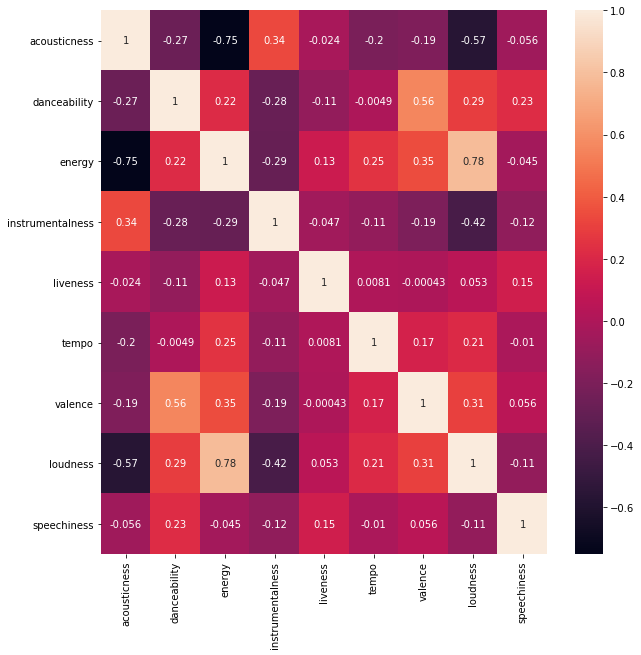

In [ ]:
corr = data[["acousticness","danceability","energy", "instrumentalness",
             "liveness","tempo", "valence", "loudness", "speechiness"]].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

 # Audio Trends

In [ ]:
avg_year = data[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness", "year"]].\
groupby("year").mean().sort_values(by="year").reset_index()

avg_year.head()

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness
0,1921,0.895823,0.425661,0.236784,0.322330,0.215814,100.397758,0.425495,-17.095438,0.077258
1,1922,0.939236,0.480000,0.237026,0.440470,0.238647,101.376139,0.534056,-19.179958,0.115419
2,1923,0.976329,0.568462,0.246936,0.401932,0.236656,112.456598,0.624788,-14.373882,0.098619
3,1924,0.935575,0.548654,0.347033,0.583955,0.237875,120.653359,0.668574,-14.202304,0.090210
4,1925,0.965422,0.571890,0.264373,0.408893,0.243094,115.671715,0.616430,-14.516707,0.115457


# Line Plot (Trends in these variables)

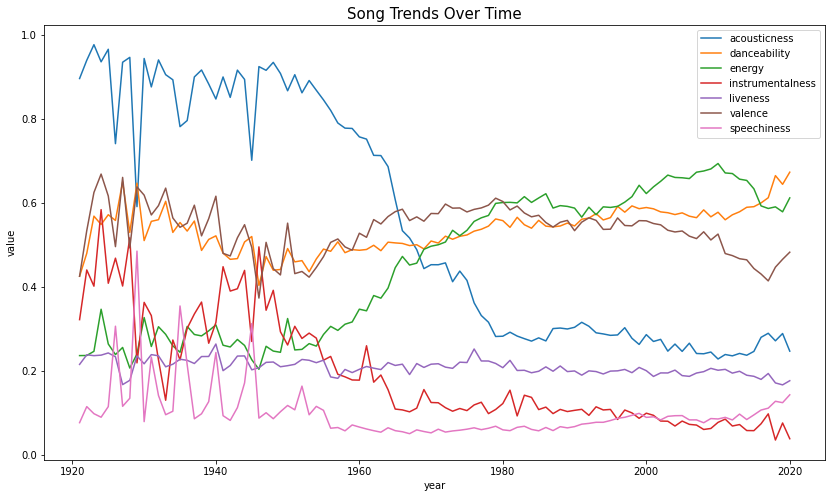

In [ ]:
plt.figure(figsize=(14,8))
plt.title("Song Trends Over Time", fontdict={"fontsize": 15})

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data= avg_year)

    
plt.ylabel("value")
plt.legend(lines)

# Analyzing : Artist with the most number of songs

In [ ]:
data["artists"].nunique() #Checking number of unique artists in the dataset

33375

In [ ]:
data["artists"].value_counts()[:10] #The Top 10 artists

['Эрнест Хемингуэй']      1215
['Francisco Canaro']       938
['Эрих Мария Ремарк']      781
['Ignacio Corsini']        620
['Frank Sinatra']          592
['Bob Dylan']              539
['The Rolling Stones']     512
['Johnny Cash']            502
['The Beach Boys']         491
['Elvis Presley']          488
Name: artists, dtype: int64

In [ ]:
artist_lt = data.artists.value_counts().index[:10] # Top 10 artists with the most number of songs 

dt_artists = data[data.artists.isin(artist_lt)][["artists","year"]].\
groupby(["artists","year"]).size().reset_index(name="song_count")

dt_artists.head()

,artists,year,song_count
0,['Bob Dylan'],1962,13
1,['Bob Dylan'],1963,73
2,['Bob Dylan'],1964,21
3,['Bob Dylan'],1965,66
4,['Bob Dylan'],1966,72


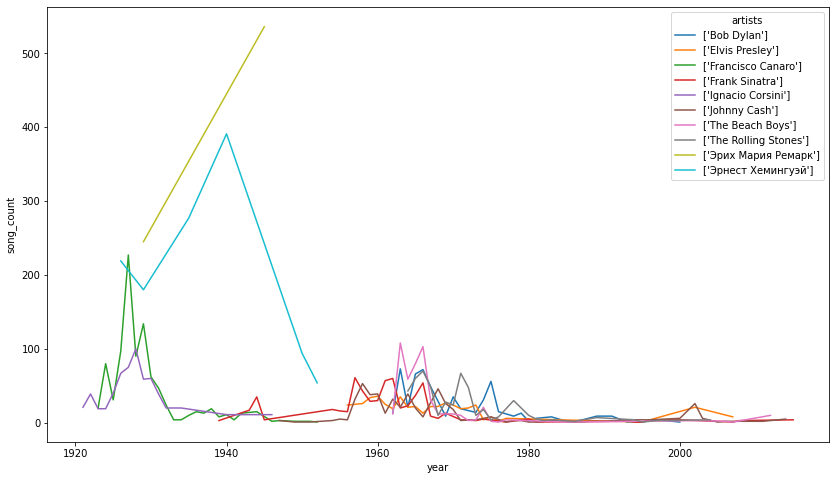

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(x="year", y="song_count", hue="artists", data=dt_artists)

In [ ]:
dt_artists.columns

Index(['artists', 'year', 'song_count'], dtype='object')

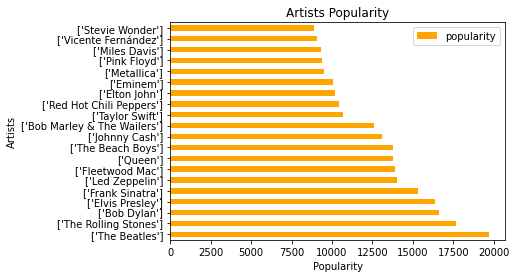

In [ ]:
artists_grp = data.groupby(['artists'])
Top20artists = artists_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]
Top20artists.plot.barh(color='orange')
plt.title('Artists Popularity')
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.show()

In [ ]:
top_artists = pd.DataFrame(np.zeros((100,10)), columns=artist_lt)
top_artists['year'] = np.arange(1921,2021)
print(top_artists.shape)
top_artists.head()

(100, 11)


,['Эрнест Хемингуэй'],['Francisco Canaro'],['Эрих Мария Ремарк'],['Ignacio Corsini'],['Frank Sinatra'],['Bob Dylan'],['The Rolling Stones'],['Johnny Cash'],['The Beach Boys'],['Elvis Presley'],year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1921
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1922
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1923
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1924
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1925


In [ ]:
top_artists = top_artists.melt(id_vars='year',var_name='artists', value_name='song_count')
print(top_artists.shape)
top_artists.head()

(1000, 3)


,year,artists,song_count
0,1921,['Эрнест Хемингуэй'],0.0
1,1922,['Эрнест Хемингуэй'],0.0
2,1923,['Эрнест Хемингуэй'],0.0
3,1924,['Эрнест Хемингуэй'],0.0
4,1925,['Эрнест Хемингуэй'],0.0


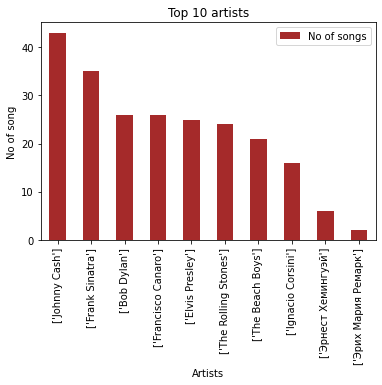

In [ ]:
Top10 = pd.DataFrame({'No of songs':dt_artists['artists'].value_counts().head(10)})
Top10.plot.bar(color='brown')
plt.title('Top 10 artists')
plt.xlabel('Artists')
plt.ylabel('No of song')
plt.show()

In [ ]:
dt_merge = pd.merge(top_artists, dt_artists, on=['year','artists'], how='outer').\
sort_values(by='year').reset_index(drop=True)
dt_merge.head()

,year,artists,song_count_x,song_count_y
0,1921,['Эрнест Хемингуэй'],0.0,NaN
1,1921,['The Beach Boys'],0.0,NaN
2,1921,['Johnny Cash'],0.0,NaN
3,1921,['The Rolling Stones'],0.0,NaN
4,1921,['Bob Dylan'],0.0,NaN


If an artist does not have any songs in a particular year, that value is filled with NaN. Let's also replace NaN values with 0 and drop song_count_x column.

In [ ]:
dt_merge.fillna(0, inplace=True)
dt_merge.drop('song_count_x', axis=1, inplace=True)
dt_merge.rename(columns={'song_count_y':'song_count'}, inplace=True)
dt_merge.head()

,year,artists,song_count
0,1921,['Эрнест Хемингуэй'],0.0
1,1921,['The Beach Boys'],0.0
2,1921,['Johnny Cash'],0.0
3,1921,['The Rolling Stones'],0.0
4,1921,['Bob Dylan'],0.0


Adding a column that shows the cumulative sum of the songs that each artist produced over the years. One way to do that is to use groupby and cumsum functions.

In [ ]:
dt_merge['cumsum'] = dt_merge[['song_count','artists']].groupby('artists').cumsum()
dt_merge.head(10)

,year,artists,song_count,cumsum
0,1921,['Эрнест Хемингуэй'],0.0,0.0
1,1921,['The Beach Boys'],0.0,0.0
2,1921,['Johnny Cash'],0.0,0.0
3,1921,['The Rolling Stones'],0.0,0.0
4,1921,['Bob Dylan'],0.0,0.0
5,1921,['Frank Sinatra'],0.0,0.0
6,1921,['Ignacio Corsini'],21.0,21.0
7,1921,['Эрих Мария Ремарк'],0.0,0.0
8,1921,['Francisco Canaro'],0.0,0.0
9,1921,['Elvis Presley'],0.0,0.0


An animated bar plot that spans through the entire timeline to see how each artist dominates in different years.There will be a bar for each artists. The bars will go up as the cumulative number of songs for artists increase.

In [ ]:
import plotly.express as px

%matplotlib inline

In [ ]:
fig = px.bar(dt_merge, x='artists', y='cumsum', color='artists',
             animation_frame='year', animation_group='year',
             range_y=[0,1300],title='Artists with Most Songs')
fig.show()

# Recommendation System

**Importing the Data**

In [ ]:
artists_dt = pd.read_csv('/content/drive/MyDrive/data_by_artist.csv')
artists_dt = artists_dt.rename(columns={"count": "playCount"})

In [ ]:
artists_dt.head(5)

,artists,mode,playCount,genres,user_id,rating
0,"""Cats"" 1981 Original London Cast",1.0,12,14,1313,3
1,"""Cats"" 1983 Broadway Cast",1.0,26,14,1320,5
2,"""Fiddler On The Roof” Motion Picture Chorus",1.0,7,15,1281,2
3,"""Fiddler On The Roof” Motion Picture Orchestra",1.0,27,15,1089,4
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",1.0,9,14,1158,3


In [ ]:
artists_dt.columns

Index(['artists', 'mode', 'playCount', 'genres', 'user_id', 'rating'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans 
%matplotlib inline

In [ ]:
# we will replace each feature with its Genre for our convience and for easy tracking
scaler = MinMaxScaler()
artists_dt.iloc[:,1:-1] = scaler.fit_transform(artists_dt.iloc[:,1:-1])
km = KMeans(n_clusters=25)
artists_dt['genres'] = km.fit_predict(artists_dt.iloc[:,1:-1])
artists_dt = artists_dt.iloc[:,[0,-3,-2,-1]]
artists_dt.head()

,artists,mode,playCount,genres
0,"""Cats"" 1981 Original London Cast",1.0,12,14
1,"""Cats"" 1983 Broadway Cast",1.0,26,14
2,"""Fiddler On The Roof” Motion Picture Chorus",1.0,7,15
3,"""Fiddler On The Roof” Motion Picture Orchestra",1.0,27,15
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",1.0,9,14


In [ ]:
artists_dt['user_id'] = np.random.randint(1000,1400,len(artists_dt))
artists_dt['rating'] = np.random.randint(1,6,len(artists_dt))
artists_dt.head()

,artists,mode,playCount,genres,user_id,rating
0,"""Cats"" 1981 Original London Cast",1.0,12,14,1342,5
1,"""Cats"" 1983 Broadway Cast",1.0,26,14,1022,5
2,"""Fiddler On The Roof” Motion Picture Chorus",1.0,7,15,1328,5
3,"""Fiddler On The Roof” Motion Picture Orchestra",1.0,27,15,1221,2
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",1.0,9,14,1362,5


In [ ]:
artists_dt[(artists_dt['user_id']==1313) & (artists_dt['genres']==15)]

,artists,mode,playCount,genres,user_id,rating
9428,Guy d'Hardelot,1.0,3,15,1313,1
18205,Otto Vajda,1.0,1,15,1313,5


In [ ]:
artists_dt.isna().sum()

artists      0
mode         0
playCount    0
genres       0
user_id      0
rating       0
dtype: int64

In [ ]:
def recommend_me(user):
    """This function will recommend artists to any user with its genre profile"""
    # first we will choose user top liked genres
    fav_genre = artists_dt[artists_dt['user_id']==user].sort_values(by=['rating','playCount'], ascending=False)['genres'][:5]
    fav_genre = list(dict.fromkeys(fav_genre))
      # lets clear out the artists from list whose songs has been listened by the user
    listened_artist = artists_dt.index[artists_dt['artists'].isin(['Johann Sebastian Bach','Frédéric Chopin'])].tolist()
    
    # rest data
    remaining_artist = artists_dt.drop(listened_artist, axis=0)
    CanBeRecommened =  remaining_artist[remaining_artist['genres'].isin(fav_genre)]
    
    # now lets sort our artists whose are popular in this user favorite genre
    CanBeRecommened = CanBeRecommened.sort_values(by=['rating','playCount',], ascending=False)[['artists', 'genres', 'rating', 'playCount']][:5]
    
    # output will contain artists name, genres, other useres rating and song played count
    return CanBeRecommened

In [ ]:
recommend_me(1313)

,artists,genres,rating,playCount
7070,Ella Fitzgerald,15,5,863
15777,Marvin Gaye,12,5,542
4260,Chet Baker,15,5,305
19651,Ramones,23,5,296
22588,Stevie Ray Vaughan,23,5,240
